#### 4 Using Networkx to Explore Pathfinding Specific graphs Algorithms Dijkstra and A* (A star) 

Setup of simple examples with A* 


In [50]:
#image below using <img src="files/wgraph2.png"> 

Edx Graph  
<img src="files/wgraph3.png">

In [51]:
import networkx as nx

In [52]:
import  matplotlib.pyplot as plt  

In [53]:
#inline matplotlib 
%matplotlib inline

In [54]:
g1 = nx.Graph()

In [55]:
g1.add_nodes_from(['s','a','b','c','g'])

In [56]:
#labels 
g1.add_edge('s','a', weight=1)
g1.add_edge('s','b', weight=4)
g1.add_edge('a','b', weight=2)
g1.add_edge('a','c', weight=5)
g1.add_edge('a','g', weight=12)
g1.add_edge('b','c', weight=2)
g1.add_edge('c','g', weight=3)

In [57]:
edge_labs = dict([( (u,v), d['weight']) for u,v,d in g1.edges(data=True)])
print edge_labs

{('b', 'c'): 2, ('c', 'g'): 3, ('s', 'b'): 4, ('a', 's'): 1, ('a', 'g'): 12, ('a', 'b'): 2, ('a', 'c'): 5}


In [58]:
#pos fixed pos
#set of fixed positions for the node 
fixed_positions = {'s':(0,4),'a':(4,6), 'b':(4,2), 'c':(8,4), 'g':(12,4)}#dict with two of the positions set

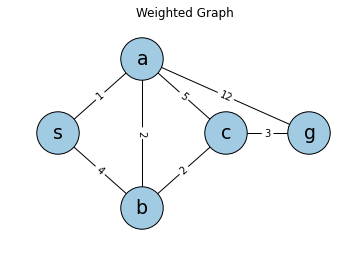

In [59]:
#
LIGHT_BLUE =  '#A0CBE2'  #html hex colors http://www.color-hex.com/color/a0cbe2
pos = fixed_positions
nx.draw_networkx(g1, pos, with_labels=True, node_size=1800, node_color=LIGHT_BLUE, font_size= 19 ) #node_color='b'
nx.draw_networkx_edge_labels(g1, pos, edge_labels=edge_labs) 

#nodes = nx.draw_networkx_nodes(g1,pos)
#nodes.set_edgecolor('g')

nx.draw_networkx_nodes(g1, pos, node_shape =None, node_color=LIGHT_BLUE , font_size = 20    )
#https://networkx.github.io/documentation/latest/_modules/networkx/drawing/nx_pylab.html 

plt.title("Weighted Graph")
plt.axis('off')   #removes axis
plt.show()

In [61]:
nx.dijkstra_path(g1, 's','g')

['s', 'a', 'b', 'c', 'g']

Edx Graph  
<img src="files/wgraph3.png">

In [67]:
 #hval with inadmissible h vals 
hval = {'s':7, 'a':6 , 'b':2, 'c':1, 'g':0 }

In [68]:
def d1(a,b):
    print a,b
    return hval[a]


In [69]:
#write a little function... 
nx.astar_path(g1,'s','g', heuristic=d1 )

a g
b g
c g
g g


['s', 'b', 'c', 'g']

In [70]:
#some arbitrary values 
hval = {'s':7, 'a':4, 'b':2,'c':1,'g':0}

In [71]:
#run with different hvals
nx.astar_path(g1,'s','g', heuristic=d1 )

a g
b g
c g
g g


['s', 'a', 'b', 'c', 'g']

##Digression

little digression we could use rough distance since we have pos
distance = sqrt((x2-x1)**2 + (y2-y1)**2)
http://www.calculatorsoup.com/calculators/geometry-plane/distance-two-points.php

In [15]:
#example from http://networkx.lanl.gov/reference/generated/networkx.algorithms.shortest_paths.astar.astar_path.html
G=nx.path_graph(5)
print(nx.astar_path(G,0,4))

G=nx.grid_graph(dim=[3,3])  # nodes are two-tuples (x,y)

def dist(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

print(nx.astar_path(G,(0,0),(2,2),dist))
[(0, 0), (0, 1), (1, 1), (1, 2), (2, 2)]

[0, 1, 2, 3, 4]
[(0, 0), (0, 1), (1, 1), (1, 2), (2, 2)]


[(0, 0), (0, 1), (1, 1), (1, 2), (2, 2)]

In [24]:
#pos fixed pos
#set of fixed positions for the node 
pos1 = {'s':(0,4),'a':(4,6), 'b':(4,2), 'c':(8,4), 'g':(12,4)}#dict with two of the positions set

In [33]:
pos1['a'] #get the tuple

(4, 6)

In [35]:
pos1['a'][0] #get x 

4

In [37]:
import math

In [72]:
def d2(a,b):
    #print "pt1=",a,"pt2=",b
    #print  pos1[b][0], pos1[a][0]   ,  pos1[b][1],pos1[a][1]   
    #print ((pos1[b][0]- pos1[a][0])**2) , ((pos1[b][1]-pos1[a][1])**2)   
    z = math.sqrt( ((pos1[b][0]- pos1[a][0])**2) + ((pos1[b][1]-pos1[a][1])**2)  ) 
    return z 
        

In [73]:
#write a little function... 
nx.astar_path(g1,'s','g',  heuristic=d2 )

['s', 'a', 'c', 'g']